<a href="https://colab.research.google.com/github/chaeeuen/python-machine-learing/blob/main/3_15_ESAA_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Matplotlib 기본 그래프 도구

## 1. 선 그래프

### 기본 사용법

1) 누락 데이터 처리
 : df = df.fillna(method='ffill')
2) 주석
 : annotate()
 > arrowstyle='->',
 > va= 'center', 'top', 'bottom', 'baeline'
 > ha= 'center', 'left', 'right'

 3) 화면분할하여 그래프 여러개 그리기 - axe 객체 활용
 : add_subplot(행의 크기, 열의 크기, 서브플롯 순서) > 그림 틀 만들기
 : legend() > 범례표시
 : set_ylim() > y축의 최대 최솟값
 : set_xticklabels() > 글자 회전

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
df  = pd.read_excel("/content/drive/MyDrive/시도별 전출입 인구수.xlsx", engine = 'openpyxl', header =0)

mask = (df['전출지별'] == '서울특별시') & ( df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

Mounted at /content/drive


In [1]:
from matplotlib import rc
rc('font', family='AppleGothic')

In [2]:
sr_one = df_seoul.loc['경기도']
plt.plot(sr_one.index, sr_one.values)

plt.plot(sr_one)

sr_one = df_seoul.loc['경기도']
plt.plot(sr_one.index, sr_one.values)

plt.title('서울->경기 인구이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

NameError: name 'df_seoul' is not defined

In [5]:
sr_one = df_seoul.loc['경기도']
plt.figure(figsize=(14,5))
plt.xticks(rotation='vertical')
plt.plot(sr_one.index, sr_one.values)

plt.title('서울->경기 인구이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울->경기'],loc='best')
plt.show()

KeyError: '경기도'

In [6]:
plt.ylim(50000,800000)
plt.annotate('',
             xy=(20,620000),
             xytext(2,290000),
             xycoords='data', arrowprops=dict(arrowstyle='->', color='skyblue', lw=5)
             )

plt.annotate('',
             xy=(47,450000),
             xytext(30,2580000),
             xycoords='data', arrowprops=dict(arrowstyle='->', color='olive', lw=5)
             )

plt.annotate('인구이동증가(1970-1995)',
             xy=(10,550000),
             rotation=25,
             va='baseline',
             ha='center',
             fontsize=15,
             )


plt.annotate('인구이동감소(1995-2017)',
             xy=(40,560000),
             rotation=11,
             va='baseline',
             ha='center',
             fontsize=15,
             )

plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-6-666a13ee4311>, line 6)

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor = 'green', markersize=10, color='olive', linewidth =2, label='서울->경기')
ax2.legend(loc='best')

ax1.set_ylim(50000,80000)
ax2.set_ylim(50000,80000)

ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()

NameError: name 'sr_one' is not defined

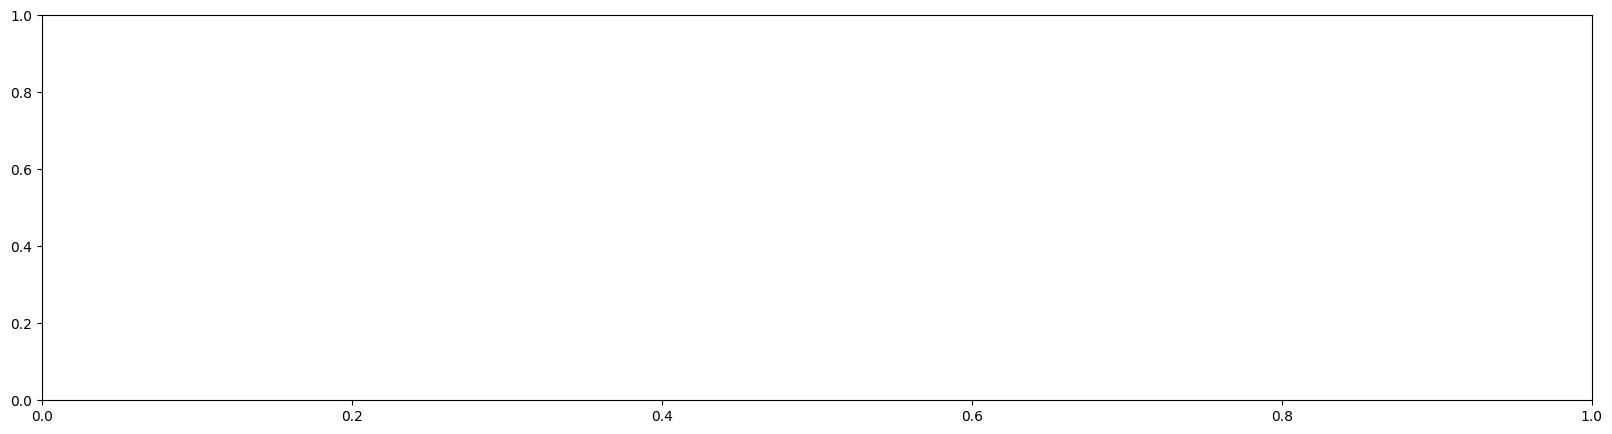

In [7]:
fig = plt.figure(figsize=(20,5))
ax= fig.add_subplot(1,1,1)

ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10, color='olive', linewidth=2, label='서울->경기')
ax.legend(loc='best')

ax.set_title('서울->경기 인구이동', size=12)
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

ax.set_sticklabels(sr_one.index, rotation=75)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()

In [ ]:
col_years = list(map(str,range(1970,2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도'], col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, label='서울->충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=2, label='서울->경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red', markersize=10, color='amgenta', linewidth=2, label='서울->강원')

ax.legend(loc='best')

ax.set_title('서울->충남, 경북, 강원 인구이동', size=20)

ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동 인구수',size=12)

ax.set_xticklabels(col_years, rotation=90)

ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()


In [14]:
col_years = list(map(str,range(1970,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


ax1.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, label='서울->충남')
ax2.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=2, label='서울->경북')
ax3.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor='red', markersize=10, color='amgenta', linewidth=2, label='서울->강원')
ax4.plot(col_years, df_4.loc['전라남도',:], marker='o', markerfacecolor='orange', markersize=10, color='yellow', linewidth=2, label='서울->전남')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

ax1.set_title('서울->충남 인구이동', size=15)
ax2.set_title('서울->경북 인구이동', size=15)
ax3.set_title('서울->강원 인구이동', size=15)
ax4.set_title('서울->전남 인구이동', size=15)

ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()

KeyError: "None of [Index(['충청남도', '경상북도', '강원도', '전라남도'], dtype='object', name='전입지')] are in the [index]"

In [ ]:
mask =(df['전출지별']== '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = sf_seoul.drop(['전출지별',axis=1])
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

col_years=list(map(str,range(1970,2018)))

df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')

df_4.index = df_4.index.map(int)

df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20,10))

plt.title('서울->타시도 인구이동', size=30)
plt.ylabel('이동 인구수', size=20)
plt.xlabel('기간',size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

In [ ]:
df_4.index = df_4.index.map(int)

df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20,10))

plt.title('서울->타시도 인구이동', size=30)
plt.ylabel('이동 인구수', size=20)
plt.xlabel('기간',size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

In [ ]:
df_4.index = df_4.index.map(int)

df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20,10))
print(type(ax))


plt.title('서울->타시도 인구이동', size=30)
plt.ylabel('이동 인구수', size=20)
plt.xlabel('기간',size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

In [ ]:
col_years=list(map(str,range(2010,2018)))

df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')

df_4.index = df_4.index.map(int)

df_4.plot(kind='bar', figsize=(20,10), width=0.7, color=['orange','green','skyblue','blue'])

plt.title('서울->타시도 인구이동', size=30)
plt.ylabel('이동 인구수', size=20)
plt.xlabel('기간',size=20)
plt.ylim(5000,3000)
plt.legend(loc='best', fontsize=15)

plt.show()

In [ ]:
col_years=list(map(str,range(2010,2018)))

df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4['합계']=df_4.sum(axis=1)
df_total=df_4[['합계']].sort_values(by='합계',ascending=True
                                  )
plt.style.use('ggplot')

df_total.plot(kind='barh', figsize=(10,5), width=0.5, color='cornfloweblue')

plt.title('서울->타시도 인구이동')
plt.ylabel('전입지')
plt.xlabel('이동인구수')


plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font', family='AppleGothic')

plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus']=False

df = pd.read_excel('./남북한발전전력량.xlsx', engine='openxyl', convert_float=True)
df=df.loc[5:9]
df.drop('전력량(억kWh)', axis='columns', inplace=True)
df.set_index('발전전력별', inplace=True)
df=df.T

df=df.rename(columns={'합계':'총발전량'})
df['총발전략-1년']=df['총발전량'].shift(1)
df['증감률']=((df['총발전량-1년'])-1)*100

ax1=df[['수력','화력'].plot(kind='bar',figsize=(20,10), width=0.7, stacked=True)]
ax2= ax1.twinx()
ax2.plot(df.index, df.증감률, ls='--', marker='o', markersize=20, color='red',label='전년대비 증감률(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도', size=20)
ax2.set_ylabel('발전량(억 Kwh)')
ax2.set_ylabel('전년대비 증감률(%)')

plt.title('북한전력발전량(1990~2016)', size=30)
axl.legend(loc='upper left')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df=pd.read_csv('./auto-mpg.csv', header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower','weight','acceleration', 'model year', 'origin', 'name']
df.plot(kind="scatter", x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.title('Scatter plot - mpg vs weight')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df=pd.read_csv('./auto-mpg.csv', header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower','weight','acceleration', 'model year', 'origin', 'name']

df['count']=1
df_origin=df.groupby('origin').sum()
print(df_origin.head())

df_origin.index('USA','EU','JPN')
df_origin['count'].plot(kind='pie', figsize=(7,5), autopct='%1.1f%%', satartangle=10, colors=['chocolate', 'bisque', 'cadetblue'])
plt.title('Model Origin', size=20)
plt.axis('equal')
plt.show()